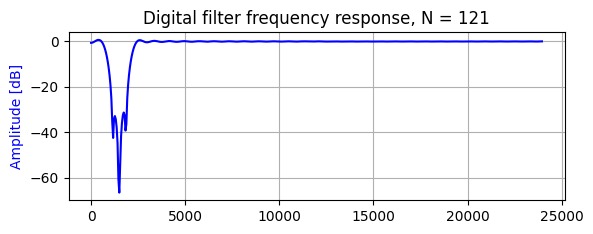

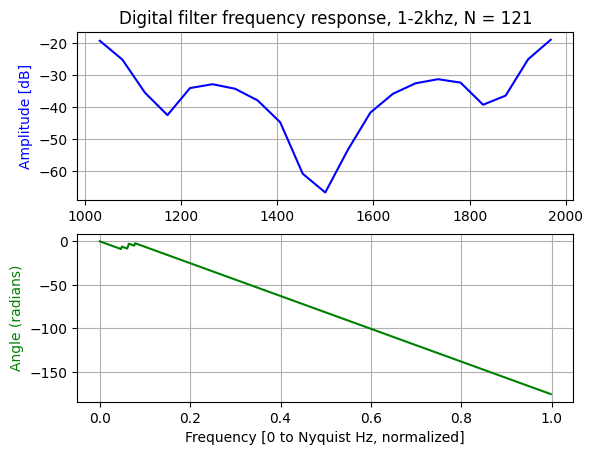

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Your filter design here
# firls() can be called via signal.firls()
sampling_rate = 48000
ntaps = 121
bands = (0,700,1000,2000,2300,sampling_rate/2)
gains = (1,1,0,0,1,1)
weights = (1,1,1)
b = signal.firls(ntaps,bands, gains,weights,fs=sampling_rate)

# Signal analysis
w, h = signal.freqz(b)

linearfreqs = w / np.pi * sampling_rate/2
plt.figure()
plt.subplot(2,1,1)
plt.title('Digital filter frequency response, N = ' + str(len(b)))
plt.plot(linearfreqs, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')

plt.figure()
plt.subplot(2,1,1)
plt.title('Digital filter frequency response, 1-2khz, N = ' + str(len(b)))
plt.plot(linearfreqs[(linearfreqs>=1000)&(linearfreqs<=2000)], (20 * np.log10(abs(h)))[(linearfreqs>=1000)&(linearfreqs<=2000)], 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')

plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
plt.plot(w / np.pi, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('Frequency [0 to Nyquist Hz, normalized]')
plt.show()


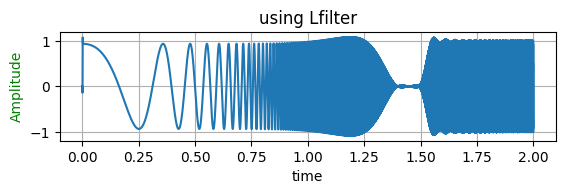

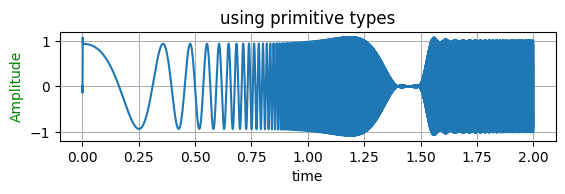

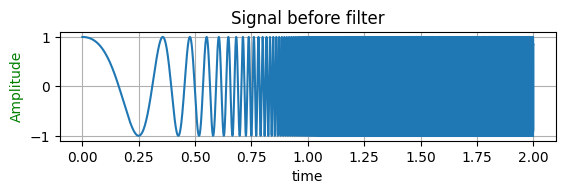

In [9]:
F_s = 48000
t = [i / F_s for i in range(2 * F_s)]

test_data = signal.chirp(t, 1, t[-1], 24000, method='logarithmic')

#using Lfilt

plt.subplot(3,1,1)
plt.title("using Lfilter")
angles = np.unwrap(np.angle(h))
plt.plot(t, signal.lfilter(b = b, a  = 1, x =test_data))
plt.ylabel('Amplitude', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('time')
plt.show()


output = np.zeros(len(t))
for i in range(len(t)):
    for j in range(len(b)):
        if((i-j) < 0):
            break
        output[i] += test_data[i-j] * b[j]

plt.subplot(3,1,2)
plt.title("using primitive types")
angles = np.unwrap(np.angle(h))
plt.plot(t, output)
plt.ylabel('Amplitude', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('time')
plt.show()

#original signal

plt.subplot(3,1,3)
plt.title("Signal before filter")
angles = np.unwrap(np.angle(h))
plt.plot(t, test_data)
plt.ylabel('Amplitude', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('time')
plt.show()

You can design any filter if you allow the filter order to go to infinity. What are the practical considerations to using a longer filter?  
  
  The longer a filter is the more time it takes to use it on a signal. In the case that we are getting input in real time we need to wait till we have a sufficiently long string of input in order to provide our output. This will cause delay in the system
  
The sharper the transition bands, the larger the ripple in the passband. We've defined a relatively narrow stopband. How wide can you make the transition bands while still meeting your application's requirements?  
  
  I can approximately make the transition band 200hz wide and get the requirements I need.



  Also I decided to use 171 taps as it seemed like it gave a precise enough filter and I don't want unecessary delay assuming this system was used in real time
  
  
  
  
  
  